In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.utils import class_weight
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import log_loss
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.ops.logging_ops import Print
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from itertools import product
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate
import joblib
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import roc_curve, auc

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
data = df.copy()

In [46]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1    165
0    138
Name: output, dtype: int64


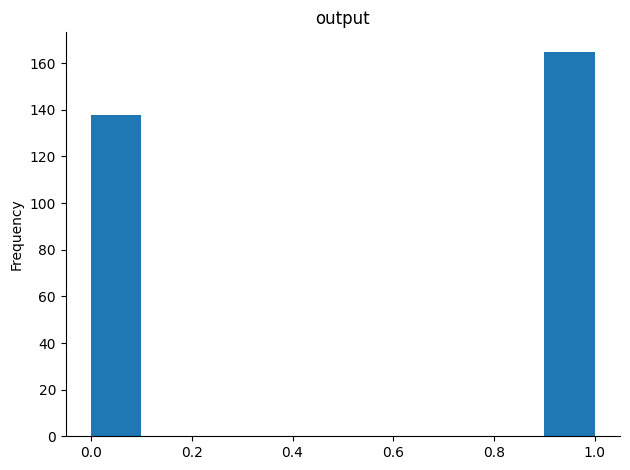

In [47]:
value_counts = data['output'].value_counts()


data['output'].plot(kind='hist', title='output')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
# Imprime la cantidad de 0s y 1s
print(value_counts)

#split stratyfile-->desvalance

In [48]:

# Separa las características, en y es la salida, y en X todas menos output
y = data['output']
X = data.drop(columns=['output'])

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Mantengo la proporcion de datos(aprox 1,18)

In [50]:
print(y_test.value_counts())
print(y_train.value_counts())

1    33
0    28
Name: output, dtype: int64
1    132
0    110
Name: output, dtype: int64


In [51]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

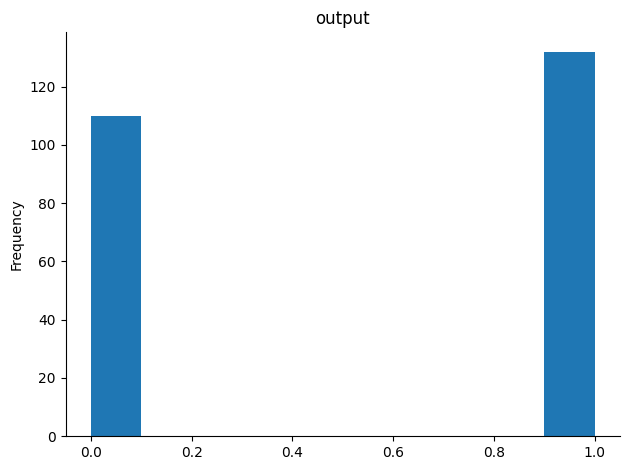

In [52]:
y_train.plot(kind='hist', title='output')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

# ⬆⬆⬆⬆ Todo igual para todos ⬆⬆⬆⬆

# **RNA**





# **RNA**

Uso **k-fold=5**  para **1, 5 y 10 capas** ocultas con ***conbinaciones*** diferentes, **13 y 26 neuronas** por capa las cuales tienen **activacion relu** y una capa de salida con **activacion sigmoid**

In [53]:
# Configuración de capas ocultas y neuronas
hidden_layer_options = [1, 5,10]
neuronas=[13,26]
datos=[]
iteraciones=[10,160,260]
i=-1
for num_hidden_layers in hidden_layer_options:
    porcentaje=0
    i+=1
    if(num_hidden_layers<6):permutations = list(product(neuronas, repeat=num_hidden_layers))
    else:
        permutations = list(product(neuronas, repeat=10))
        permutations = random.sample(permutations, 52)

    print(f"Entrenando modelo con {num_hidden_layers} capas ocultas...")
    for z in permutations:
      if len(z)==num_hidden_layers:
        # Configurar K-Fold Cross Validation con Stratify, para 5 splits con datos mezclados, es decir mezcla antes de partir(splits)
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        for train_index, val_index in kf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model = keras.Sequential()
            model.add(keras.layers.Dense(units=13, input_shape=[13]))

            # Creo N capas ocultas cada una con w neuronas
            for w in z:
                model.add(keras.layers.Dense(w, activation='relu'))
            # Salida sigmoid aproxima a 0 ó 1
            model.add(keras.layers.Dense(1, activation='sigmoid'))

            # Lo mismo de arriba pero agrego la métrica de precisión
            model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error', metrics=['accuracy'])


            entrenamiento = model.fit(X_train_fold, y_train_fold, epochs=100, verbose=False)
            y_pred = model.predict(X_val_fold)

            # Evalúa la pérdida y la precisión en el conjunto de validación
            loss, accuracy = model.evaluate(X_val_fold, y_val_fold)

            porcentaje+=1
            print("=============",(porcentaje/iteraciones[i])*100,"% del progreso para",num_hidden_layers,"capas ocultas ============ \n")

            datos.append([num_hidden_layers, z, accuracy,loss])




Entrenando modelo con 1 capas ocultas...
2/2 [==============================] - 0s 8ms/step - loss: 0.2041 - accuracy: 0.7959
============= 10.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 8ms/step - loss: 0.1621 - accuracy: 0.8367
============= 20.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 12ms/step - loss: 0.2917 - accuracy: 0.7083
============= 30.0 % del progreso para 1 capas ocultas ============ 



2/2 [==============================] - 0s 7ms/step


2/2 [==============================] - 0s 11ms/step - loss: 0.1875 - accuracy: 0.8125
============= 40.0 % del progreso para 1 capas ocultas ============ 



2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 11ms/step - loss: 0.1251 - accuracy: 0.8750
============= 50.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 10ms/step - loss: 0.1429 - accuracy: 0.8571
============= 60.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 9ms/step - loss: 0.1020 - accuracy: 0.8980
============= 70.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 8ms/step - loss: 0.3333 - accuracy: 0.6667
============= 80.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 14ms/step - loss: 0.1250 - accuracy: 0.8750
============= 90.0 % del progreso para 1 capas ocultas ============ 

2/2 [==============================] - 0s 11ms/step - loss: 0.1042 - accuracy: 0.8958
============= 100.0 % del progreso para 1 capas ocultas ============ 

Entrenando modelo con 5 capas ocultas...
2/2 [===================

# Resultados

In [54]:
# Crear un DataFrame de pandas
df_E0 = pd.DataFrame(datos, columns=['Capas', 'Distribucion', 'Accuracy','Loss'])

# Imprimir la tabla
#
ac=0
los=0
dis=()
cap=0
lista=[]
for index, row in df_E0.iterrows():
  if(((index+1)%5)==0):#reinicia
    ac+=row[2]
    los+=row[3]
    lista.append([row[0], row[1], ac/5,los/5])
    ac=0
    los=0
  else:
    ac+=row[2]
    los+=row[3]

#print(len(lista))
df_E1 = pd.DataFrame(lista, columns=['Capas', 'Distribucion', 'Accuracy','Loss'])
print(df_E1)


df_sorted = df_E1.sort_values(by=df_E1.columns[3], ascending=True)

# Imprimir el DataFrame ordenado
#print(df_sorted)
capas=[10,5,1]
for i in capas:
  for index, row in df_sorted.iterrows():
        if row['Capas'] == i:
            #print(row)
            #print("para",row[0],"capas, el mejor modelo tiene",row[2],"accuracy y",row[3],"de perdida con distribucion neuronal de",row[1],"\n")
            print(f"Evaluación del mejor modelo con {row[0]} capas ocultas en datos de prueba...")
            print(f"Pérdida en datos de prueba: {row[3]}")
            print(f"Precisión en datos de prueba: {row[2]} ")
            print(f"Con distibucion: {row[1]}\n")


            break

    Capas                              Distribucion  Accuracy      Loss
0       1                                     (13,)  0.805697  0.194079
1       1                                     (26,)  0.838520  0.161463
2       5                      (13, 13, 13, 13, 13)  0.627891  0.327293
3       5                      (13, 13, 13, 13, 26)  0.652806  0.343784
4       5                      (13, 13, 13, 26, 13)  0.649575  0.289050
..    ...                                       ...       ...       ...
81     10  (26, 26, 26, 26, 13, 26, 26, 13, 26, 13)  0.582313  0.270737
82     10  (26, 13, 13, 13, 13, 13, 13, 13, 26, 26)  0.491667  0.426126
83     10  (26, 26, 26, 26, 26, 13, 26, 13, 26, 13)  0.586990  0.368651
84     10  (13, 13, 13, 13, 26, 13, 13, 26, 13, 13)  0.660799  0.250775
85     10  (26, 26, 26, 13, 13, 13, 13, 13, 13, 26)  0.525000  0.435499

[86 rows x 4 columns]
Evaluación del mejor modelo con 10 capas ocultas en datos de prueba...
Pérdida en datos de prueba: 0.213341203331

# **XGBoost**

In [55]:

model = XGBClassifier(random_state=42, eval_metric='logloss')
parameters = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [ 110, 120, 130],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [110, 120, 130]},
             scoring='accuracy')

# **Resultados**

In [56]:
cv_results = grid_search.cv_results_
for mean_score, std, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    print(f"Precisión: {mean_score:.4f}, Desviación: {std:.4f} para los parámetros {params}" )

Precisión: 0.8061, Desviación: 0.0609 para los parámetros {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 110}
Precisión: 0.8020, Desviación: 0.0605 para los parámetros {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120}
Precisión: 0.8020, Desviación: 0.0605 para los parámetros {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 130}
Precisión: 0.8185, Desviación: 0.0515 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110}
Precisión: 0.8185, Desviación: 0.0449 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120}
Precisión: 0.8143, Desviación: 0.0379 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 130}
Precisión: 0.7978, Desviación: 0.0385 para los parámetros {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 110}
Precisión: 0.7978, Desviación: 0.0385 para los parámetros {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120}
Precisión: 0.7978, Desviación: 0.0385 para los parámetro

In [57]:
results = grid_search.cv_results_
#print(grid_search.best_params_)
for mean_score, std, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
  if(params==grid_search.best_params_):
        print(f"Precisión: {mean_score:.4f}, Desviación: {std:.4f} para los parámetros {params}" )

Precisión: 0.8185, Desviación: 0.0515 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110}


# **Kernel**

In [58]:
kernel_types=('linear', 'poly', 'rbf', 'sigmoid')
paramsC = (0.1, 1, 10, 100)
datosKernel=[]
for kernel_type in kernel_types:
  for paramC in paramsC:
    new_svm = SVC(kernel=kernel_type, probability=True, random_state=42, C = paramC)
    # Definir métricas que quieres evaluar
    scoring = ['neg_log_loss', 'accuracy']

    # Realizar validación cruzada con las métricas especificadas
    results = cross_validate(new_svm, X_train, y_train, cv=5, scoring=scoring)

    # Obtener los resultados de las métricas
    neg_log_loss_scores = results['test_neg_log_loss']
    accuracy_scores = results['test_accuracy']

    accuracy = accuracy_scores.mean()
    datosKernel.append([kernel_type,paramC , accuracy,-neg_log_loss_scores .mean()])


# **Resultados**

In [59]:
df_kernel = pd.DataFrame(datosKernel, columns=['Tipo Kernel', 'Parametro C', 'Accuracy','Loss'])

# Imprimir la tabla
print(df_kernel)
df_sorted_k = df_kernel.sort_values(by=df_kernel.columns[3], ascending=True)

# Imprimir el DataFrame ordenado
#print(df_sorted)

print(f"\n \n Evaluación del mejor modelo {df_sorted_k.iloc[0, 0]} ")
print(f"Pérdida en datos de prueba: {df_sorted_k.iloc[0, 3]}")
print(f"Precisión en datos de prueba: {df_sorted_k.iloc[0, 2]} ")
print(f"Con parametro C: {df_sorted_k.iloc[0, 1]}")



   Tipo Kernel  Parametro C  Accuracy      Loss
0       linear          0.1  0.834949  0.382508
1       linear          1.0  0.839286  0.386095
2       linear         10.0  0.839286  0.387627
3       linear        100.0  0.839286  0.388613
4         poly          0.1  0.719388  0.401583
5         poly          1.0  0.814031  0.405643
6         poly         10.0  0.769133  0.484560
7         poly        100.0  0.735629  0.552285
8          rbf          0.1  0.822619  0.407155
9          rbf          1.0  0.801956  0.397998
10         rbf         10.0  0.785459  0.479793
11         rbf        100.0  0.781207  0.490166
12     sigmoid          0.1  0.826701  0.381226
13     sigmoid          1.0  0.847449  0.394886
14     sigmoid         10.0  0.818878  0.415858
15     sigmoid        100.0  0.781548  0.479937

 
 Evaluación del mejor modelo sigmoid 
Pérdida en datos de prueba: 0.3812261202315843
Precisión en datos de prueba: 0.8267006802721089 
Con parametro C: 0.1


# **Validacion con los Mejores Modelos**

# **RNA**

In [60]:
model = keras.Sequential([
    keras.layers.Dense(units=26, input_shape=[13], activation='relu') # Primera capa oculta con 26 neuronas
   ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error',metrics=['accuracy'])
model.add(keras.layers.Dense(1, activation='sigmoid'))
print("La red se esta entrenando...")
# Entrenamiento del modelo, verbose falso para mejorar la visual
entrenamiento=model.fit(X_train, y_train, epochs=100, verbose=False)
print("Finalizo el entrenamiento")



La red se esta entrenando...
Finalizo el entrenamiento


In [61]:
loss,accuracy = model.evaluate(X_test, y_test)

# Imprime las métricas de evaluación (puede incluir más según cómo hayas configurado tu modelo)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy }')

2/2 [==============================] - 0s 10ms/step - loss: 0.1951 - accuracy: 0.8033
Pérdida en el conjunto de prueba: 0.1951226145029068
Precisión en el conjunto de prueba: 0.8032786846160889


2/2 [==============================] - 0s 9ms/step


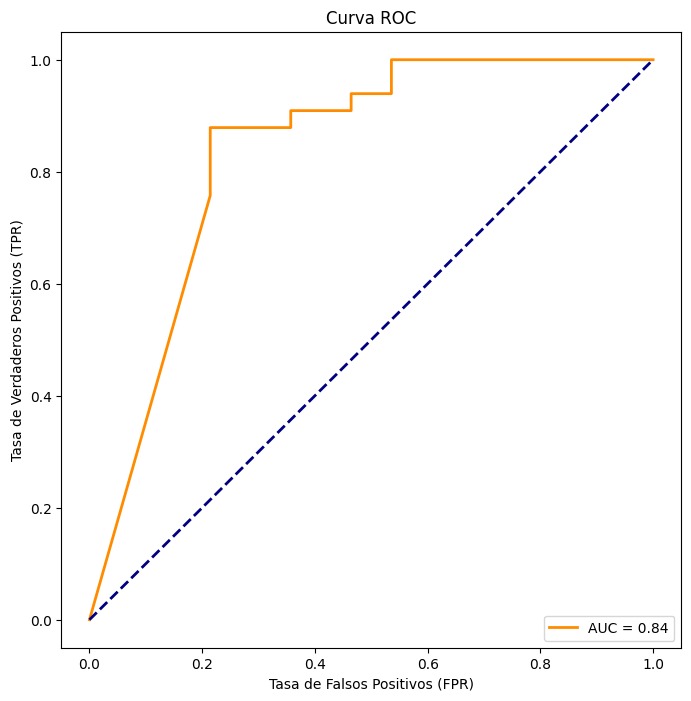

In [62]:
y_pred_probs = model.predict(X_test)
# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# **XGBoost**

In [63]:
model_final = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=110, random_state=42, eval_metric='logloss')
model_final.fit(X_train, y_train)

y_pred_final = model_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_final)
print(f'Accuracy: {accuracy:.4f}')

# Calcula y muestra la pérdida (log loss)
#loss = log_loss(y_test, y_pred_final)
#print(f'Log Loss: {loss:.4f}')

loss = log_loss(y_test, model_final.predict_proba(X_test))
print(f'Log Loss: {loss:.4f}')

probabilities = model_final.predict_proba(X_test)
std_deviation = np.std(probabilities, axis=1)

# Muestra la desviación estándar
print(f'Desviación: {np.mean(std_deviation):.4f}')


Accuracy: 0.7869
Log Loss: 0.5278
Desviación: 0.3933


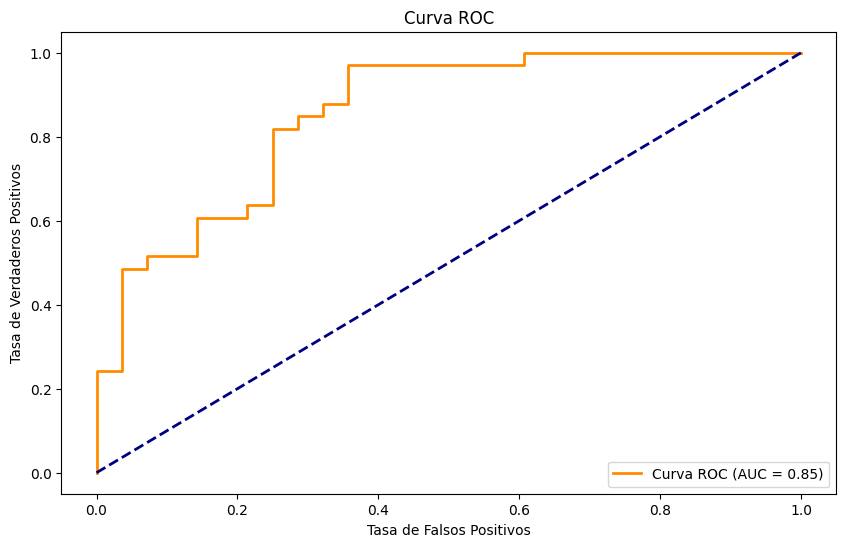

In [64]:
y_prob = model_final.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# **Kernel**

In [65]:
from sklearn.metrics import accuracy_score, log_loss
new_svm = SVC(kernel='sigmoid', probability=True, random_state=42, C = 0.1)
new_svm.fit(X_train, y_train)

y_pred = new_svm.predict(X_test)
y_prob = new_svm.predict_proba(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_prob)

print(f'Accuracy: {100 * accuracy:.4f}%')
print(f'Loss: {loss:.4f}')

Accuracy: 81.9672%
Loss: 0.4576


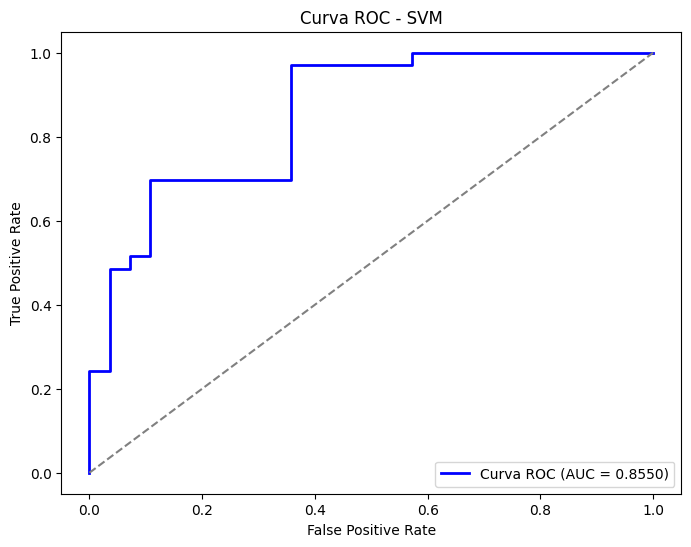

AUC: 0.8550


In [66]:


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])  # y_prob[:, 1] contiene las probabilidades de la clase positiva

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - SVM')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.4f}')